<p dir = "rtl", style = "text-align:right;font-size:22px">
    به نام خدا <br>
    <br>
پروژه درس سیستم های پیچیده
<br>
موضوع: بررسی سیستم های شیوع و اپیدمی
<br>
<br>
    اعضای گروه: <br>
    امیررضا قدیانی 99109206 <br>
    علیرضا حبیب زاده 99109206 <br>
    یاسمن کاتبی 99109206 <br>
    <br>
    <br>بهار 1402
    <br>استاد: دکتر شاهین روحانی
        <br>    <br>    <br>
        <br>

<p/>

<p dir = "rtl", style = "text-align:right;font-size:18px">
در بخش اول در ساده ترین حالت یک مدل را در نظر می گیریم که جامعه آن یک گراف کامل است، یعنی تمامی نود ها با هم در ارتباط اند حال در نظر میگیریم:
<br>
تعداد مبتلایان: I
<br>
تعداد در معرض بیماری ها: S
<br>
تعداد بهبود یافتگان: R
<br>
همچنین در نظر می گیریم که در این مدل مرگ و میر نداریم و جمعیت کل ثابت باقی می ماند:<br>
I + S + R = N = cte
<br>
معادلات حاکم بر این مدل به شرح زیر است:
<br>

<p/>

beta = 0.2 and gamma = 0.1


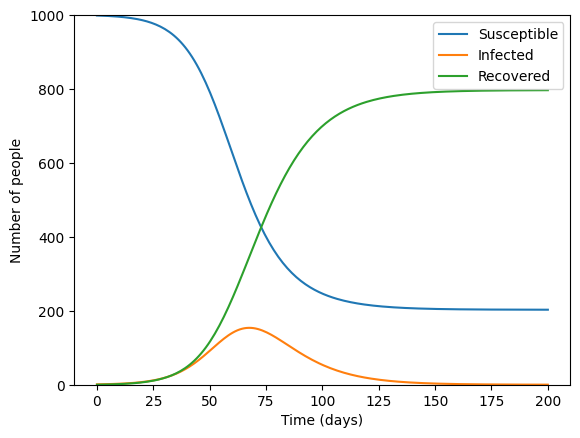

beta = 0.8 and gamma = 0.2


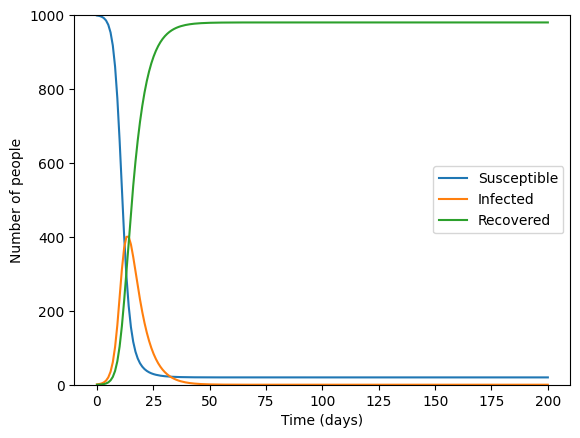

beta = 0.7 and gamma = 0.5


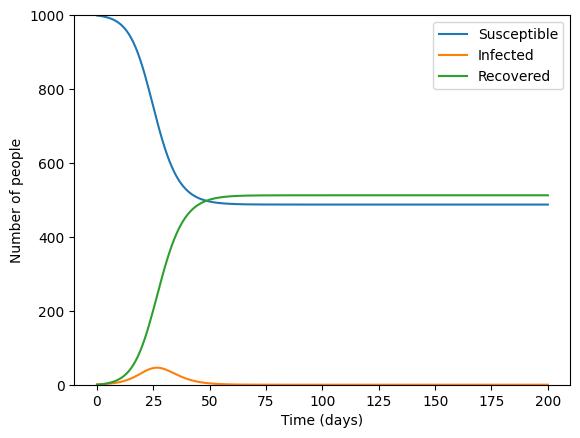

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define initial conditions
N = 1000          # total population
I0, R0 = 1, 0     # infected and recovered at t=0
S0 = N - I0 - R0  # susceptible at t=0
beta1 = 0.2        # infection rate
beta2 = 0.8        # infection rate
beta3 = 0.7        # infection rate
gamma1 = 0.1       # recovery rate
gamma2 = 0.2       # recovery rate
gamma3 = 0.5       # recovery rate

# Define the differential equations for S, I, and R
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Define the time points to simulate over
t = np.linspace(0, 200, 200)

# Solve the differential equations
y0 = S0, I0, R0
ret1 = odeint(deriv, y0, t, args=(N, beta1, gamma1))
ret2 = odeint(deriv, y0, t, args=(N, beta2, gamma2))
ret3 = odeint(deriv, y0, t, args=(N, beta3, gamma3))
S1, I1, R1 = ret1.T
S2, I2, R2 = ret2.T
S3, I3, R3 = ret3.T

# Plot the results
print("beta = 0.2 and gamma = 0.1")
fig1, ax1 = plt.subplots()
ax1.plot(t, S1, label='Susceptible')
ax1.plot(t, I1, label='Infected')
ax1.plot(t, R1, label='Recovered')
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Number of people')
ax1.set_ylim(0, N)
ax1.legend()
plt.show()
print("beta = 0.8 and gamma = 0.2")
fig2, ax2 = plt.subplots()
ax2.plot(t, S2, label='Susceptible')
ax2.plot(t, I2, label='Infected')
ax2.plot(t, R2, label='Recovered')
ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Number of people')
ax2.set_ylim(0, N)
ax2.legend()
plt.show()
print("beta = 0.7 and gamma = 0.5")
fig3, ax3 = plt.subplots()
ax3.plot(t, S3, label='Susceptible')
ax3.plot(t, I3, label='Infected')
ax3.plot(t, R3, label='Recovered')
ax3.set_xlabel('Time (days)')
ax3.set_ylabel('Number of people')
ax3.set_ylim(0, N)
ax3.legend()
plt.show()



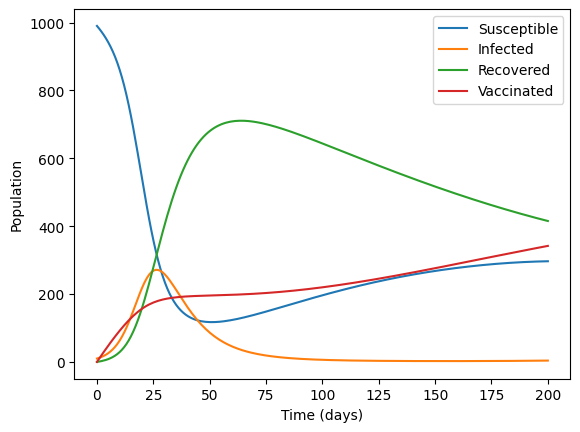

In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the SIRV model    
def sirv_model(y, t, beta, gamma, sigma, mu):
    S, I, R, V = y
    N = S + I + R
    dSdt = -beta * S * I / N + mu * N - sigma * S
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I - mu * R
    dVdt = sigma * S - mu * V
    return [dSdt, dIdt, dRdt, dVdt]

# Set the initial conditions and parameters
S0 = 990
I0 = 10
R0 = 0
V0 = 0
beta = 0.3
gamma = 0.1
sigma = 0.01
mu = 0.005
t = np.linspace(0, 200, 200)

# Solve the differential equations
sol = odeint(sirv_model, [S0, I0, R0, V0], t, args=(beta, gamma, sigma, mu))
S, I, R, V = sol.T

# Plot the results
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.plot(t, V, label='Vaccinated')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.show()

